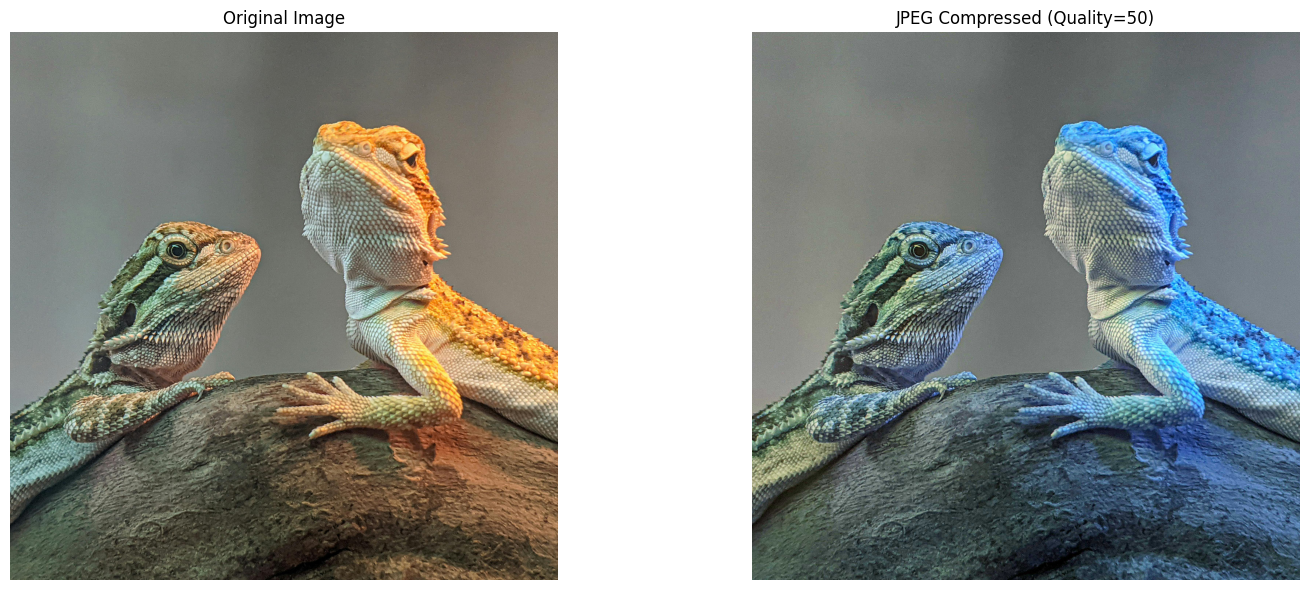

In [27]:
# ======================
# 1. LIBRARY IMPORTS 
# ======================
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===================================
# 2. IMAGE LOADING AND PREPROCESSING 
# ===================================
# Load image from specified path 
image_path = r"C:\Users\AL-MALAK\Downloads\pexels-macro-photography-12412301-12561248.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB format

# ================================= 
# 3. JPEG COMPRESSION IMPLEMENTATION 
# ================================= 
def jpeg_compress(img, quality=50):
    """Compress image using JPEG standard with specified quality (1-100)."""
    # Save compressed image temporarily
    cv2.imwrite('temp_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, quality])
    compressed = cv2.imread('temp_compressed.jpg')
    compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB)
    return compressed

# Test JPEG compression at quality=50
jpeg_img = jpeg_compress(image, quality=50)

plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# JPEG Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(jpeg_img)
plt.title("JPEG Compressed (Quality=50)")
plt.axis('off')

plt.tight_layout()
plt.savefig(r"C:\Users\AL-MALAK\Desktop\original_vs_jpeg50.png", dpi=300, bbox_inches="tight")
plt.show()


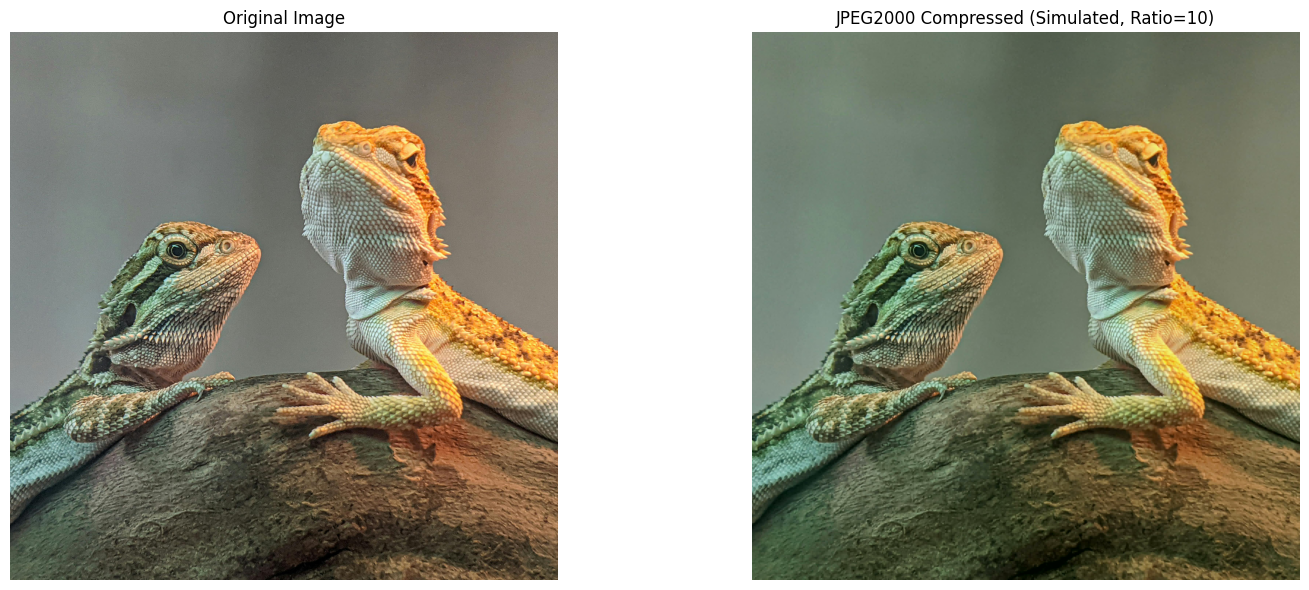

In [28]:
# ====================================
# 4. JPEG2000 COMPRESSION IMPLEMENTATION
# ====================================
import pywt  # PyWavelets for wavelet transform

def jpeg2000_compress(img, ratio=10):
    """Compress image using JPEG2000-like method using wavelets and thresholding."""
    # Convert to YCbCr color space
    img_ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    channels = cv2.split(img_ycbcr)

    compressed_channels = []
    for channel in channels:
        # Perform 3-level wavelet decomposition
        coeffs = pywt.wavedec2(channel, 'haar', level=3)

        # Thresholding to simulate compression (manual approximation of ratio)
        coeffs_thresh = []
        for i, coeff in enumerate(coeffs):
            if i == 0:
                # Approximation coefficients (low-pass)
                coeffs_thresh.append(pywt.threshold(coeff, 30, mode='soft'))
            else:
                # Detail coefficients (high-pass), which are tuples
                coeffs_thresh.append(tuple(
                    pywt.threshold(c, 30, mode='soft') for c in coeff
                ))

        # Reconstruct channel
        compressed_channel = pywt.waverec2(coeffs_thresh, 'haar')
        # Clip values to 0-255 and convert to uint8
        compressed_channel = np.clip(compressed_channel, 0, 255).astype(np.uint8)
        compressed_channels.append(compressed_channel)

    # Merge channels and convert back to RGB
    compressed_ycbcr = cv2.merge(compressed_channels)
    compressed_rgb = cv2.cvtColor(compressed_ycbcr, cv2.COLOR_YCrCb2RGB)

    return compressed_rgb

# ===========================
# Test and Display (Side by Side)
# ===========================
jpeg2000_img = jpeg2000_compress(image, ratio=10)

plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# JPEG2000 Compressed Image
plt.subplot(1, 2, 2)
plt.imshow(jpeg2000_img)
plt.title("JPEG2000 Compressed (Simulated, Ratio=10)")
plt.axis('off')

plt.tight_layout()
plt.savefig(r"C:\Users\AL-MALAK\Desktop\original_vs_jpeg2000.png", dpi=300, bbox_inches="tight")

plt.show()



In [17]:
# =================================== 
# 5. METRIC CALCULATION AND ANALYSIS 
# =================================== 
from skimage.metrics import peak_signal_noise_ratio as psnr 
from skimage.metrics import structural_similarity as ssim 
import os 
def calculate_metrics(original, compressed, original_path): 
    """Calculate PSNR, SSIM and Compression Ratio between original and compressed images""" 
    # PSNR and SSIM calculation 
    psnr_val = psnr(original, compressed) 
    ssim_val = ssim(original, compressed, channel_axis=2) 
     
    # Compression Ratio calculation 
    original_size = os.path.getsize(original_path) 
    cv2.imwrite('temp_compressed.png', cv2.cvtColor(compressed, cv2.COLOR_RGB2BGR)) 
    compressed_size = os.path.getsize('temp_compressed.png') 
    cr = original_size / compressed_size 
    return psnr_val, ssim_val, cr 
# Calculate metrics for JPEG 
jpeg_psnr, jpeg_ssim, jpeg_cr = calculate_metrics(image, jpeg_img, image_path) 
 
# Calculate metrics for JPEG2000 
jpeg2000_psnr, jpeg2000_ssim, jpeg2000_cr = calculate_metrics(image, jpeg2000_img, image_path)
# Print comparison results 
print("JPEG Metrics:") 
print(f"PSNR: {jpeg_psnr:.2f} dB | SSIM: {jpeg_ssim:.4f} | CR: {jpeg_cr:.2f}") 
print("\nJPEG2000 Metrics:") 
print(f"PSNR: {jpeg2000_psnr:.2f} dB | SSIM: {jpeg2000_ssim:.4f} | CR: {jpeg2000_cr:.2f}")

JPEG Metrics:
PSNR: 39.35 dB | SSIM: 0.9678 | CR: 0.61

JPEG2000 Metrics:
PSNR: 26.81 dB | SSIM: 0.7985 | CR: 1.67


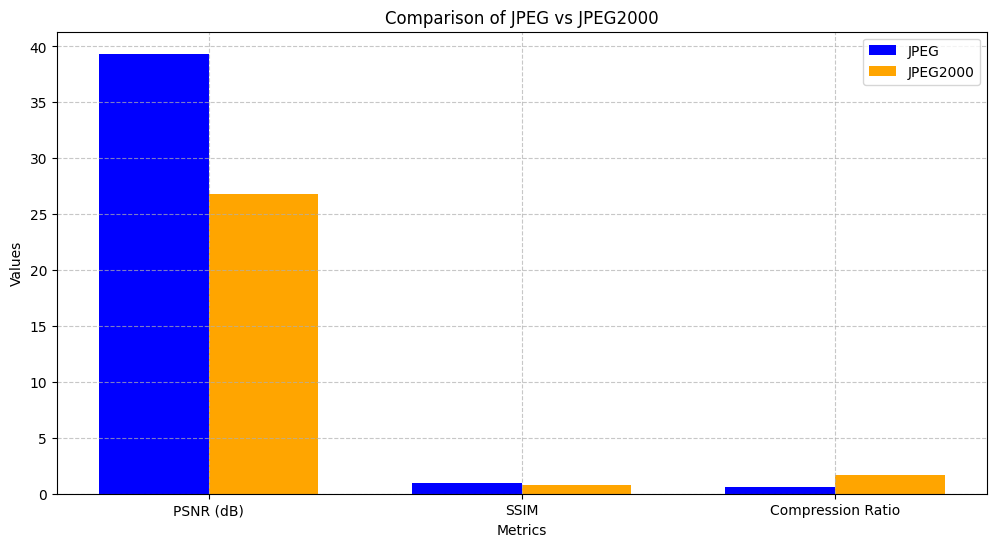

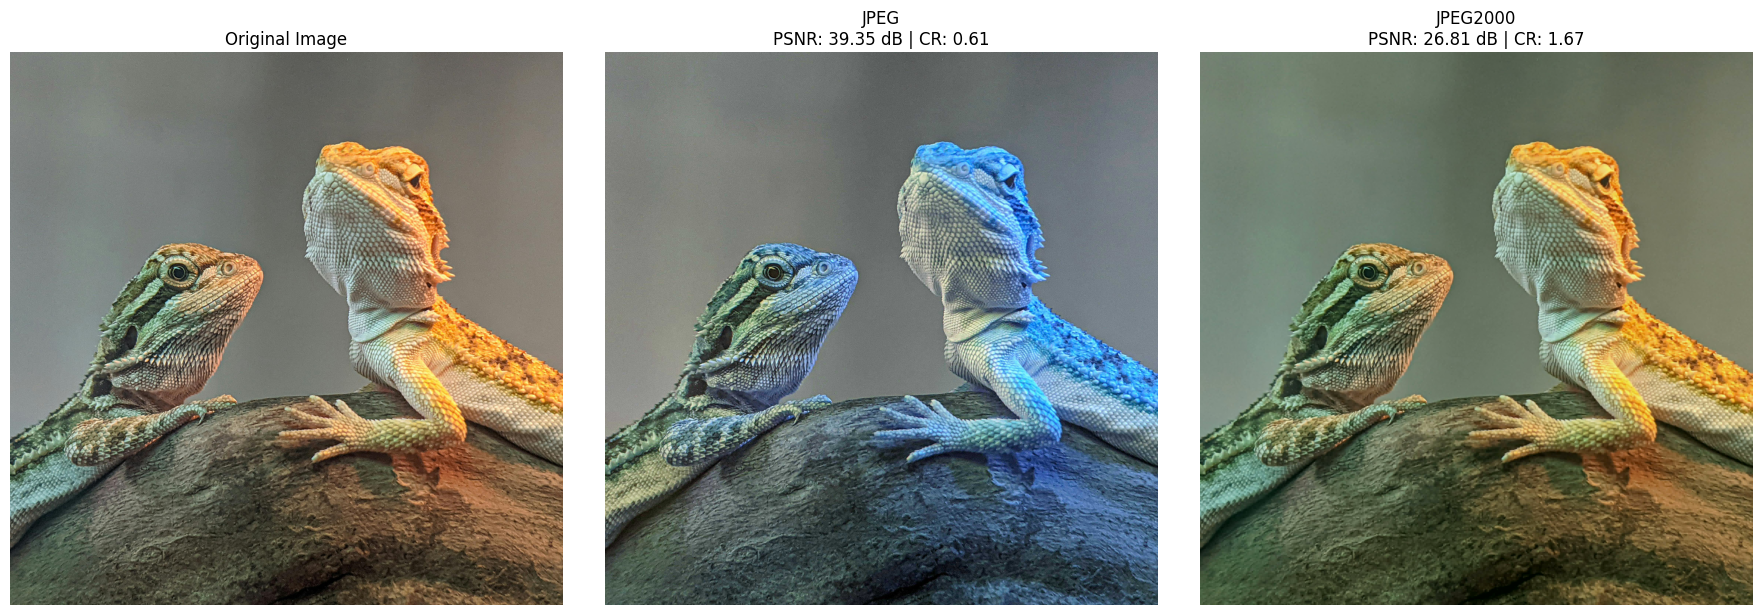

In [34]:
 # ======================================== 
# 6. VISUAL COMPARISON AND METRIC PLOTTING 
# ======================================== 
# Plot metrics comparison bar chart 
metrics = ['PSNR (dB)', 'SSIM', 'Compression Ratio'] 
jpeg_values = [jpeg_psnr, jpeg_ssim, jpeg_cr] 
jpeg2000_values = [jpeg2000_psnr, jpeg2000_ssim, jpeg2000_cr] 
x = np.arange(len(metrics)) 
width = 0.35 
plt.figure(figsize=(12, 6)) 
plt.bar(x - width/2, jpeg_values, width, label='JPEG', color='blue') 
plt.bar(x + width/2, jpeg2000_values, width, label='JPEG2000', color='orange') 
plt.xlabel('Metrics') 
plt.ylabel('Values') 
plt.title('Comparison of JPEG vs JPEG2000') 
plt.xticks(x, metrics) 
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.savefig(r"C:\Users\AL-MALAK\Desktop\Comparisionnnnoriginal_vs_jpeg2000.png", dpi=300, bbox_inches="tight")

plt.show() 
# Create side-by-side image comparison 
plt.figure(figsize=(18, 6)) 
# Original image 
plt.subplot(1, 3, 1) 
plt.imshow(image) 
plt.title("Original Image") 
plt.axis('off')
# JPEG compressed 
plt.subplot(1, 3, 2) 
plt.imshow(jpeg_img) 
plt.title(f"JPEG\nPSNR: {jpeg_psnr:.2f} dB | CR: {jpeg_cr:.2f}") 
plt.axis('off') 
 
# JPEG2000 compressed 
plt.subplot(1, 3, 3) 
plt.imshow(jpeg2000_img) 
plt.title(f"JPEG2000\nPSNR: {jpeg2000_psnr:.2f} dB | CR: {jpeg2000_cr:.2f}") 
plt.axis('off') 
 
plt.tight_layout() 
plt.savefig(r"C:\Users\AL-MALAK\Desktop\Comparison_of_JPEG_vs_JPEG2000.png", dpi=300, bbox_inches="tight")

plt.show() 

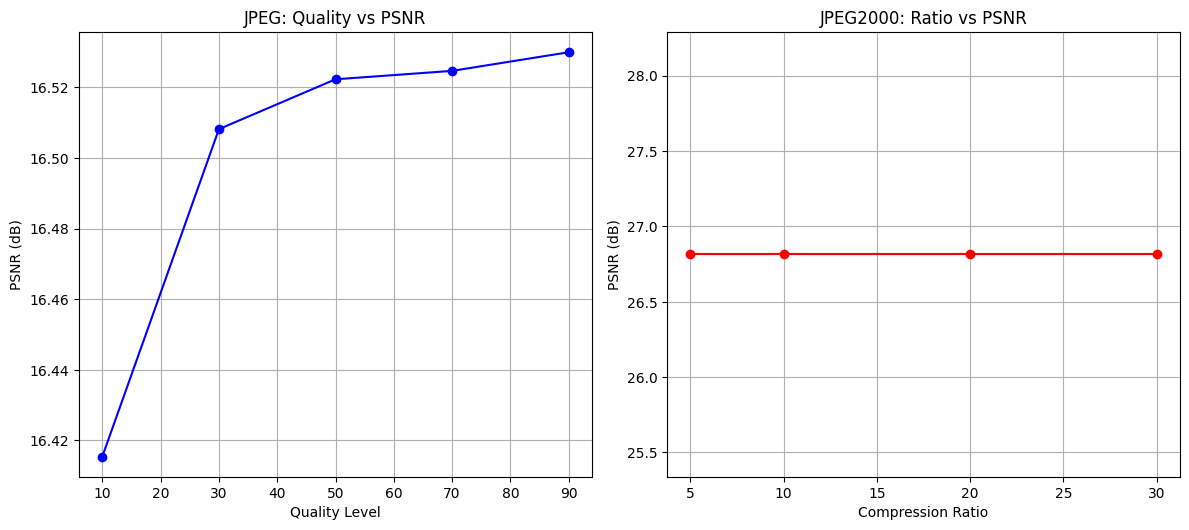

In [30]:
# ========================================= 
# 7. COMPRESSION PARAMETER ANALYSIS 
# ========================================= 
# Test different quality/ratio values 
qualities = [10, 30, 50, 70, 90]  # JPEG quality levels to test 
ratios = [5, 10, 20, 30]           # JPEG2000 compression ratios to test 
jpeg_results = [] 
jpeg2000_results = [] 
# Test JPEG at different quality levels 
for q in qualities: 
    compressed = jpeg_compress(image, quality=q) 
    psnr_val, ssim_val, cr = calculate_metrics(image, compressed, image_path) 
    jpeg_results.append((q, psnr_val, ssim_val, cr)) 
# Test JPEG2000 at different compression ratios 
for r in ratios: 
    compressed = jpeg2000_compress(image, ratio=r) 
    psnr_val, ssim_val, cr = calculate_metrics(image, compressed, image_path) 
    jpeg2000_results.append((r, psnr_val, ssim_val, cr)) 
 
# Plot parameter analysis results 
plt.figure(figsize=(12, 10)) 
 
# JPEG PSNR vs Quality plot 
plt.subplot(2, 2, 1) 
plt.plot([x[0] for x in jpeg_results], [x[1] for x in jpeg_results], 'b-o') 
plt.xlabel('Quality Level') 
plt.ylabel('PSNR (dB)') 
plt.title('JPEG: Quality vs PSNR') 
plt.grid(True) 
 
# JPEG2000 PSNR vs Ratio plot 
plt.subplot(2, 2, 2) 
plt.plot([x[0] for x in jpeg2000_results], [x[1] for x in jpeg2000_results], 'r-o') 
plt.xlabel('Compression Ratio') 
plt.ylabel('PSNR (dB)') 
plt.title('JPEG2000: Ratio vs PSNR') 
plt.grid(True) 
 
plt.tight_layout() 
plt.savefig(r"C:\Users\AL-MALAK\Desktop\JPEG-PSNR-vs-Qualityplot_JPEG2000-PSNR-vs-Ratioplot.png", dpi=300, bbox_inches="tight")

plt.show() 